<a href="https://colab.research.google.com/github/YenLinWu/matplotlib_Display_Chinese_in_Colab/blob/master/Display_Chinese_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import shutil
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties

# Step 1: 預設的字型及資料夾路徑

In [2]:
default_type = findfont( FontProperties( family=FontProperties().get_family() ) )
ttf_path = '/'.join( default_type.split('/')[:-1] )  # 預設字型的資料夾路徑 

print( f'系統預設字型: { default_type.split("/")[-1] }' )

系統預設字型: DejaVuSans.ttf


# Step 2: 微軟正黑體字型檔   

從 GitHub 上的 repository 中下載微軟正黑體字型檔(.ttf)，且將其移至預設字型的資料夾中:   

In [3]:
os.chdir( '/content' )
if not os.path.exists( '/content/matplotlib_Display_Chinese_in_Colab' ):
    !git clone https://github.com/YenLinWu/matplotlib_Display_Chinese_in_Colab

os.chdir( '/content/matplotlib_Display_Chinese_in_Colab' )
for item in os.listdir():  
    if item.endswith( '.ttf' ):
        msj_ttf_path = os.path.abspath( item ) 
        msj_name = msj_ttf_path.split('/')[-1] 

try:  
    shutil.move( msj_ttf_path, ttf_path )
except: 
    pass
finally:
    os.chdir( '/content' )
    shutil.rmtree( '/content/matplotlib_Display_Chinese_in_Colab' ) 

Cloning into 'matplotlib_Display_Chinese_in_Colab'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


# Step 3: 設定顯示的字型   

有關文字顯示的函數設定中，須增加 `fontproperties=font` 屬性，則圖便能顯示出中文字型。  

In [0]:
font = FontProperties( fname=ttf_path+'/'+msj_name )

# 範例   

實作笛卡爾的愛情公式 - 心臟線( Cardioid ) :   

* 繪圖的參考資料:   
(1) [心臟線( Cardioid )](https://en.wikipedia.org/wiki/Cardioid)   
(2) [Annotations](https://matplotlib.org/3.2.1/tutorials/text/annotations.html)

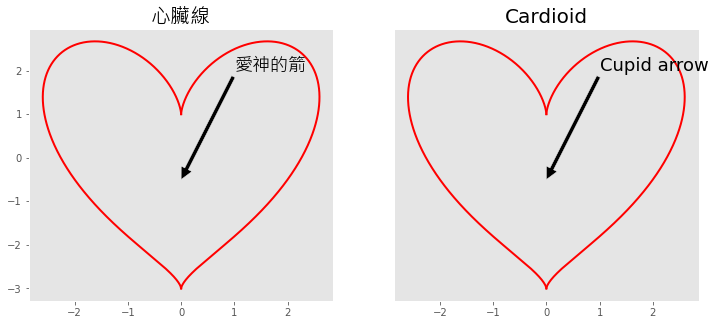

In [5]:
import numpy as np
import math
plt.style.use( 'ggplot' )

t = np.linspace( 0, math.pi, 1000 )
x = 2*( np.sin(t) - np.sin(2*t)/2 )
y = 2*( np.cos(t) - np.cos(2*t)/2 ) + np.power(x, 2.0/3)

fig, ax = plt.subplots( 1,2,figsize=(12,5) )

plt.subplot( 1,2,1 )
plt.plot( x, y, color='red', linewidth=2 )
plt.plot( -x, y, color='red', linewidth=2 )
plt.grid()
plt.title( '心臟線', fontproperties=font, fontsize=20 )
plt.annotate( '愛神的箭', xy=(0,-0.5), xytext=(1,2),
              arrowprops = dict( facecolor='black' ),
              fontproperties=font, fontsize=18 )

plt.subplot( 1,2,2 )
plt.plot( x, y, color='red', linewidth=2 )
plt.plot( -x, y, color='red', linewidth=2 )
plt.grid()
plt.yticks([])
plt.title( 'Cardioid', fontsize=20 )
plt.annotate( 'Cupid arrow', xy=(0,-0.5), xytext=(1,2),
              arrowprops = dict( facecolor='black' ), 
              fontsize=18 )

plt.show()